## 1. Import The Libraries And Dataset

In [55]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
data=pd.read_csv('C:\\Users\\Ali\\Desktop\\heart.csv')

## 2. Display Top 5 Rows of The Dataset

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### . age
### . sex
### . chest pain type (4 values)
     ### . Value 0: typical angina
     ### . Value 1: atypical angina
     ### . Value 2: non-anginal pain
     ### . Value 3: asymptomatic
### . trestbps: resting blood pressure (in mm Hg on admission to the hospital)
### . chol: serum cholestoral in mg/dl
### . fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
### . restecg: resting electrocardiographic results
      ### . Value 0: normal
      ### . Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
      ### . Value 2: showing probable or definite left ventricular hypertrophy by Estes'criteria
### . thalach: maximum heart rate achieved
### . exang: exercise induced angina (1 = yes; 0 = no)
### . oldpeak = ST depression induced by exercise relative to rest
### . slope: the slope of the peak exercise ST segment
       #### . Value 1: upsloping
       #### . Value 2: flat
       #### . Value 3: downsloping
 ### . ca: number of major vessels (0-3) colored by flourosopy
 ### . thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
 ### . target : 0=less chance of heart attack, 1=more chance of heart attack


## 3. Check The Last 5 Rows of The Dataset

In [7]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


## 4. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [8]:
data.shape

(1025, 14)

In [9]:
print("Number of Rows", data.shape[0])

Number of Rows 1025


In [10]:
print("Number of Columns", data.shape[1])

Number of Columns 14


## 5. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## 6. Check Null Values In The Dataset

In [12]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## 7. Check For Duplicate Data and Drop Them

In [13]:
data_dup = data.duplicated().any()


In [14]:
print(data_dup)

True


In [15]:
data = data.drop_duplicates()

In [16]:
data.shape

(302, 14)

## 8. Get Overall Statistics About The Dataset

In [17]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 9. Draw Correlation Matrix

In [18]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [19]:
data.corr=np.reshape(14,1)
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)


TypeError: 'numpy.ndarray' object is not callable

<Figure size 1700x600 with 0 Axes>

## 10. How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [20]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [21]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

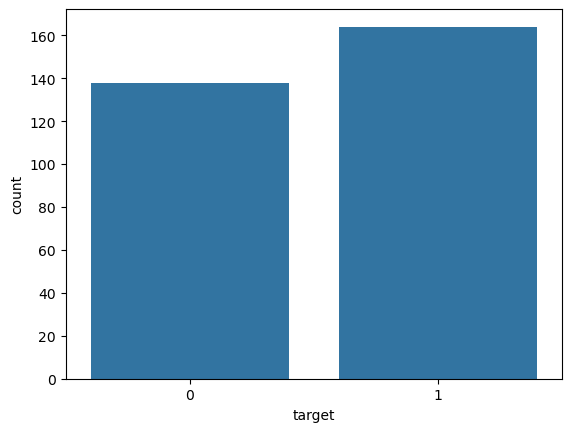

In [22]:
sns.countplot(x=data['target'])

## 11. Find Count of  Male & Female in this Dataset

In [23]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
data['sex'].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

<Axes: ylabel='count'>

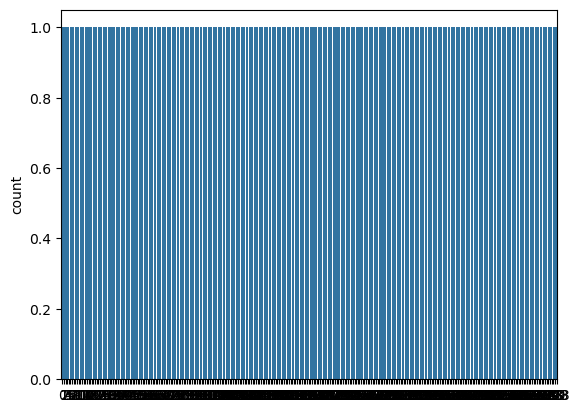

In [25]:
sns.countplot(data['sex'])

([<matplotlib.axis.XTick at 0x18dfcce2ab0>,
 [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

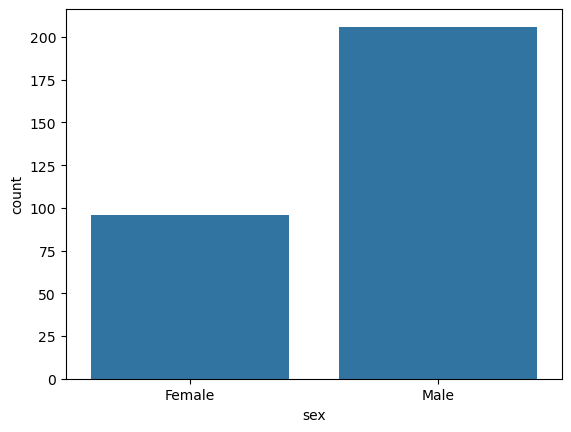

In [26]:
sns.countplot(x=data['sex'])
plt.xticks([0,1],['Female','Male'])

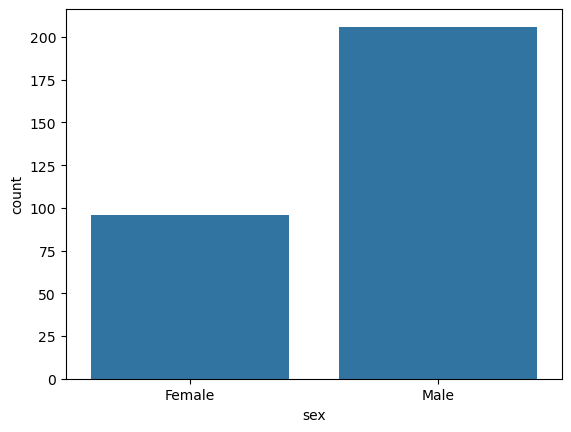

In [27]:
sns.countplot(x=data['sex'])
plt.xticks([0,1],['Female','Male'])
plt.show()

## 12. Find Gender Distribution According to The Target Variable

<Axes: xlabel='sex', ylabel='count'>

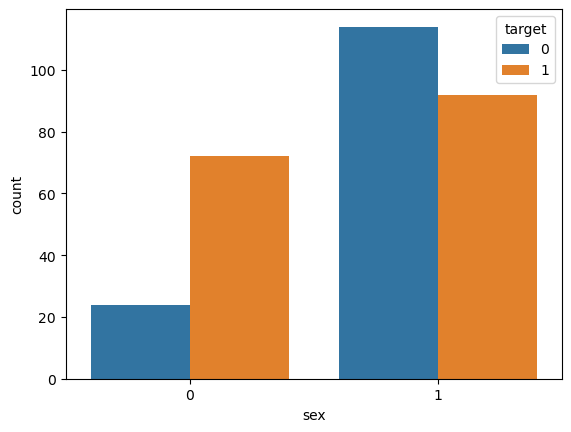

In [28]:
sns.countplot(x='sex',hue="target", data=data)

([<matplotlib.axis.XTick at 0x18dfce88560>,
 [Text(1, 0, 'Male'), Text(0, 0, 'Female')])

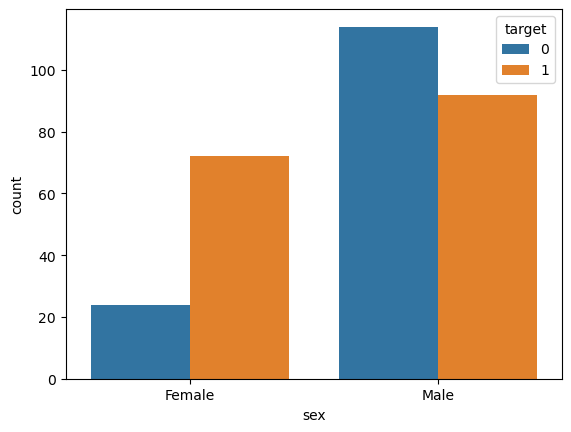

In [29]:
sns.countplot(x='sex',hue="target", data=data)
plt.xticks([1,0], ['Male','Female'])

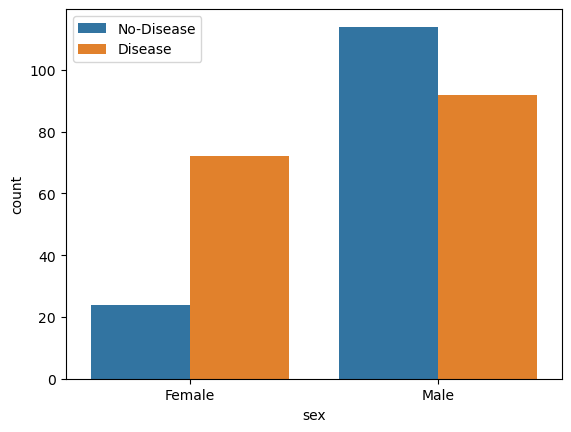

In [30]:
sns.countplot(x='sex',hue="target", data=data)
plt.xticks([1,0], ['Male','Female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

## 13. Check Age Distribution In The Dataset

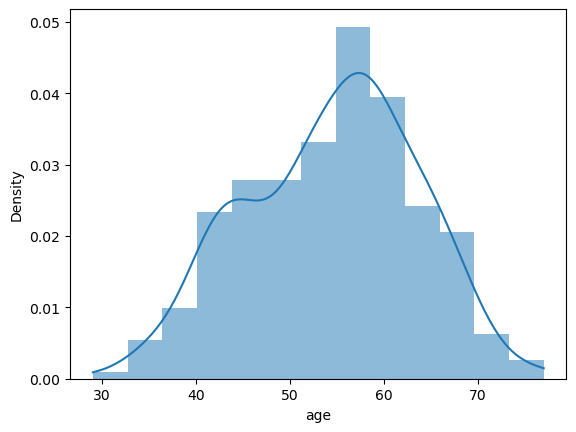

In [31]:
sns.histplot(data['age'], kde=True, stat="density", linewidth=0)
plt.show()

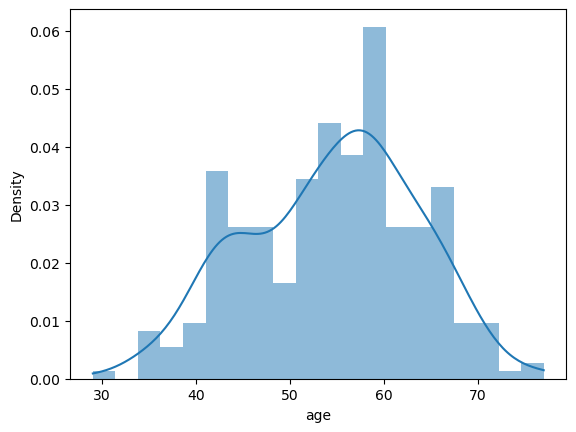

In [32]:
sns.histplot(data['age'], kde=True,bins=20, stat="density", linewidth=0)
plt.show()

## 14. Check Chest Pain Type

### . Chest pain type (4 values)
   ####   . Value 0: typical angina
   ####   . Value 1: atypical angina
   ####   . Value 2: non-anginal pain
   ####   . Value 3: asymptomatic

<Axes: xlabel='cp', ylabel='count'>

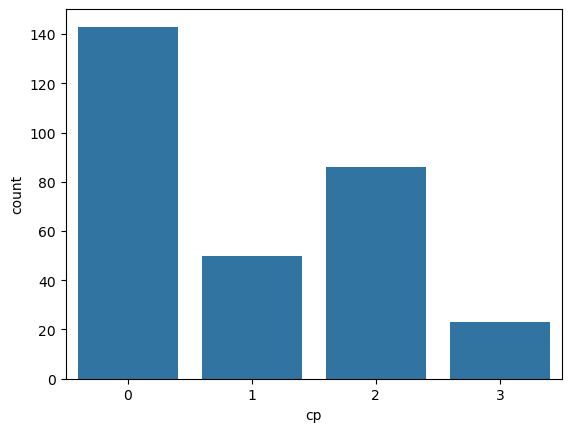

In [33]:
sns.countplot(x=data['cp'])


([<matplotlib.axis.XTick at 0x18dfcb2a3c0>,
 [Text(0, 0, 'typical angina'),
  Text(1, 0, 'atypical angina'),
  Text(2, 0, 'non-anginal pain'),
  Text(3, 0, 'asymptomatic')])

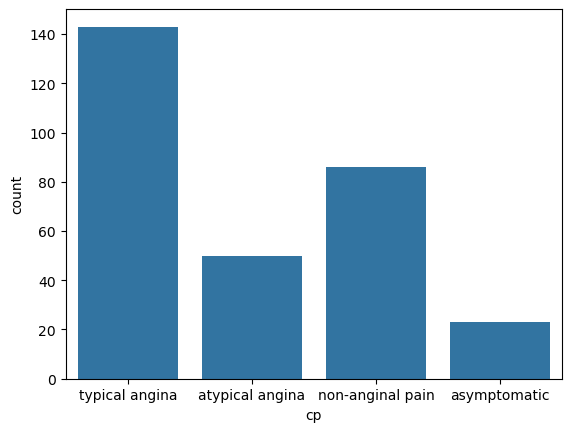

In [34]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3] , ["typical angina","atypical angina","non-anginal pain","asymptomatic"])

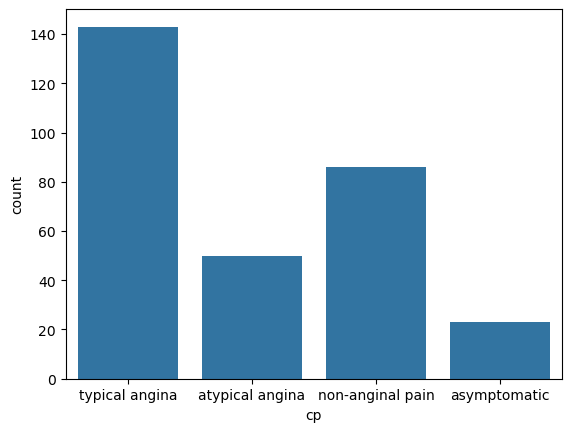

In [35]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3] , ["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.show()

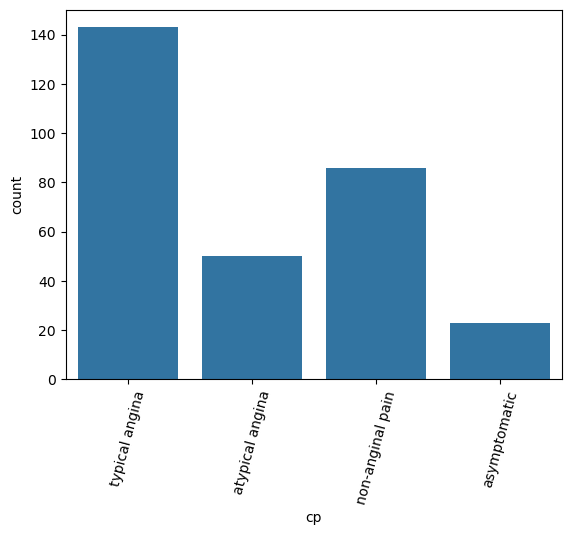

In [36]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3] , ["typical angina","atypical angina","non-anginal pain","asymptomatic"])
plt.xticks(rotation=75)
plt.show()

## 15. Show The Chest Pain Distribution As Per Target Variable

In [37]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: xlabel='cp', ylabel='count'>

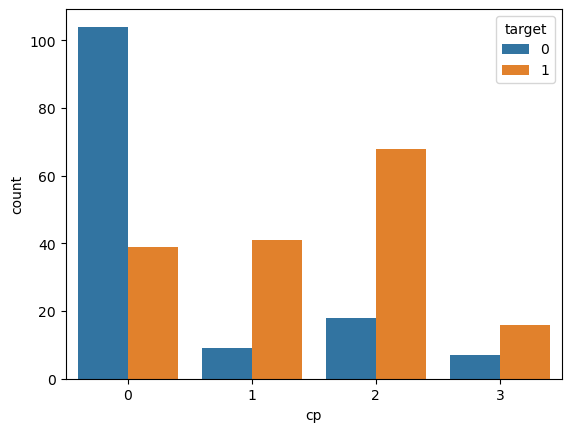

In [38]:
sns.countplot(x="cp",hue="target",data=data)

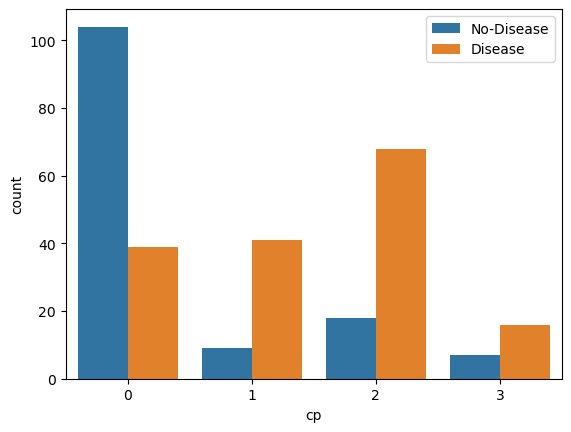

In [39]:
sns.countplot(x="cp",hue="target",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## 16. Show Fasting Blood Sugar Distribution According To Target Variable

<Axes: xlabel='fbs', ylabel='count'>

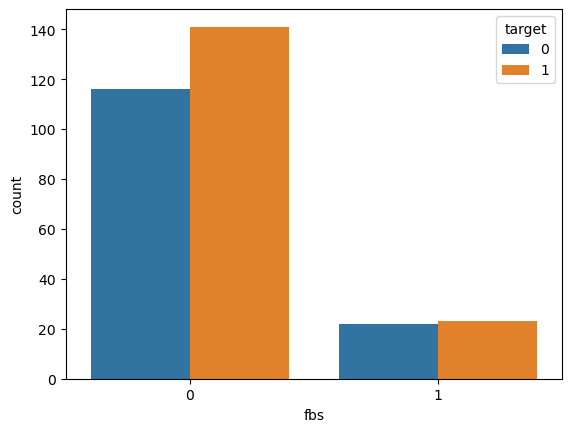

In [40]:
sns.countplot(x="fbs",hue="target",data=data)

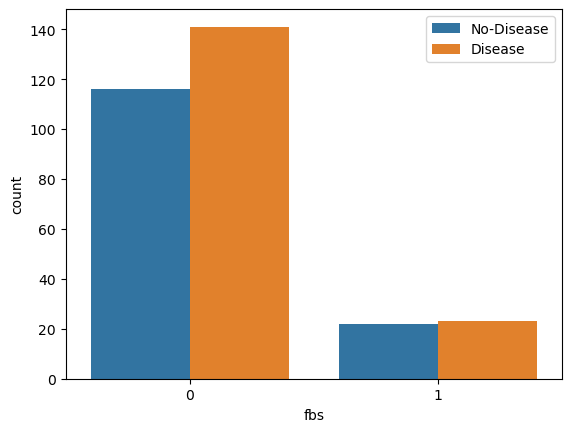

In [41]:
sns.countplot(x="fbs",hue="target",data=data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

## 17.  Check Resting Blood Pressure Distribution

In [42]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

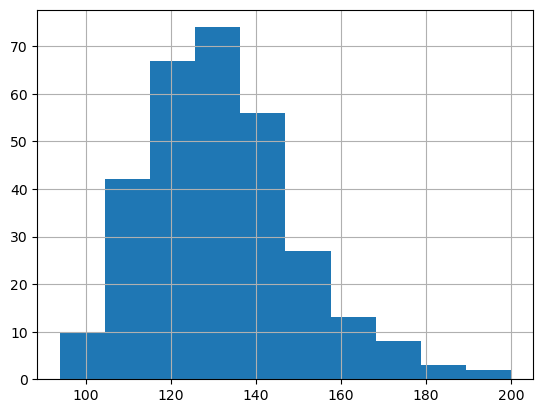

In [43]:
data['trestbps'].hist()

## 18. Compare Resting Blood Pressure As Per Sex Column

D:\Users\Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
D:\Users\Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


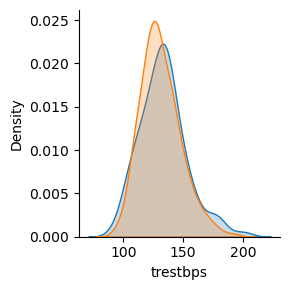

In [44]:
g = sns.FacetGrid(data,hue="sex")
g.map(sns.kdeplot,'trestbps',shade=True)

D:\Users\Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
D:\Users\Ali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


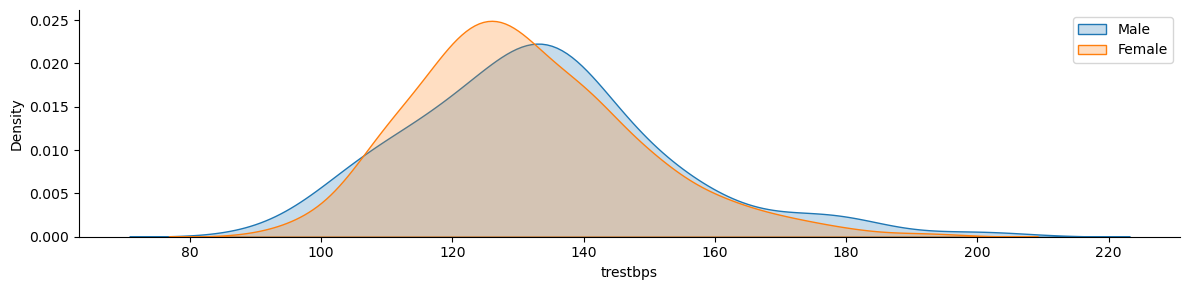

In [45]:
g = sns.FacetGrid(data,hue="sex",aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Male','Female'])

## 19. Show Distribution of Serum cholesterol

In [46]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<Axes: >

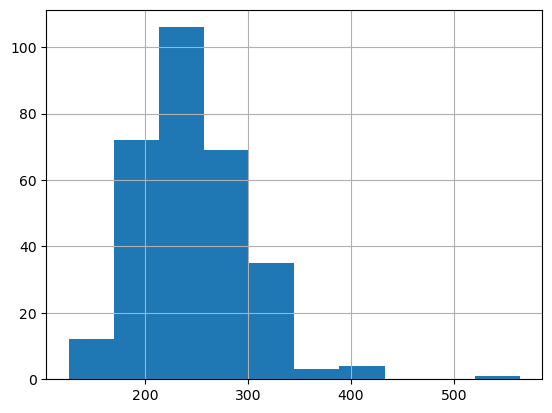

In [47]:
data['chol'].hist()

## 20. Plot Continuous Variables

In [48]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [49]:
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [50]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [51]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

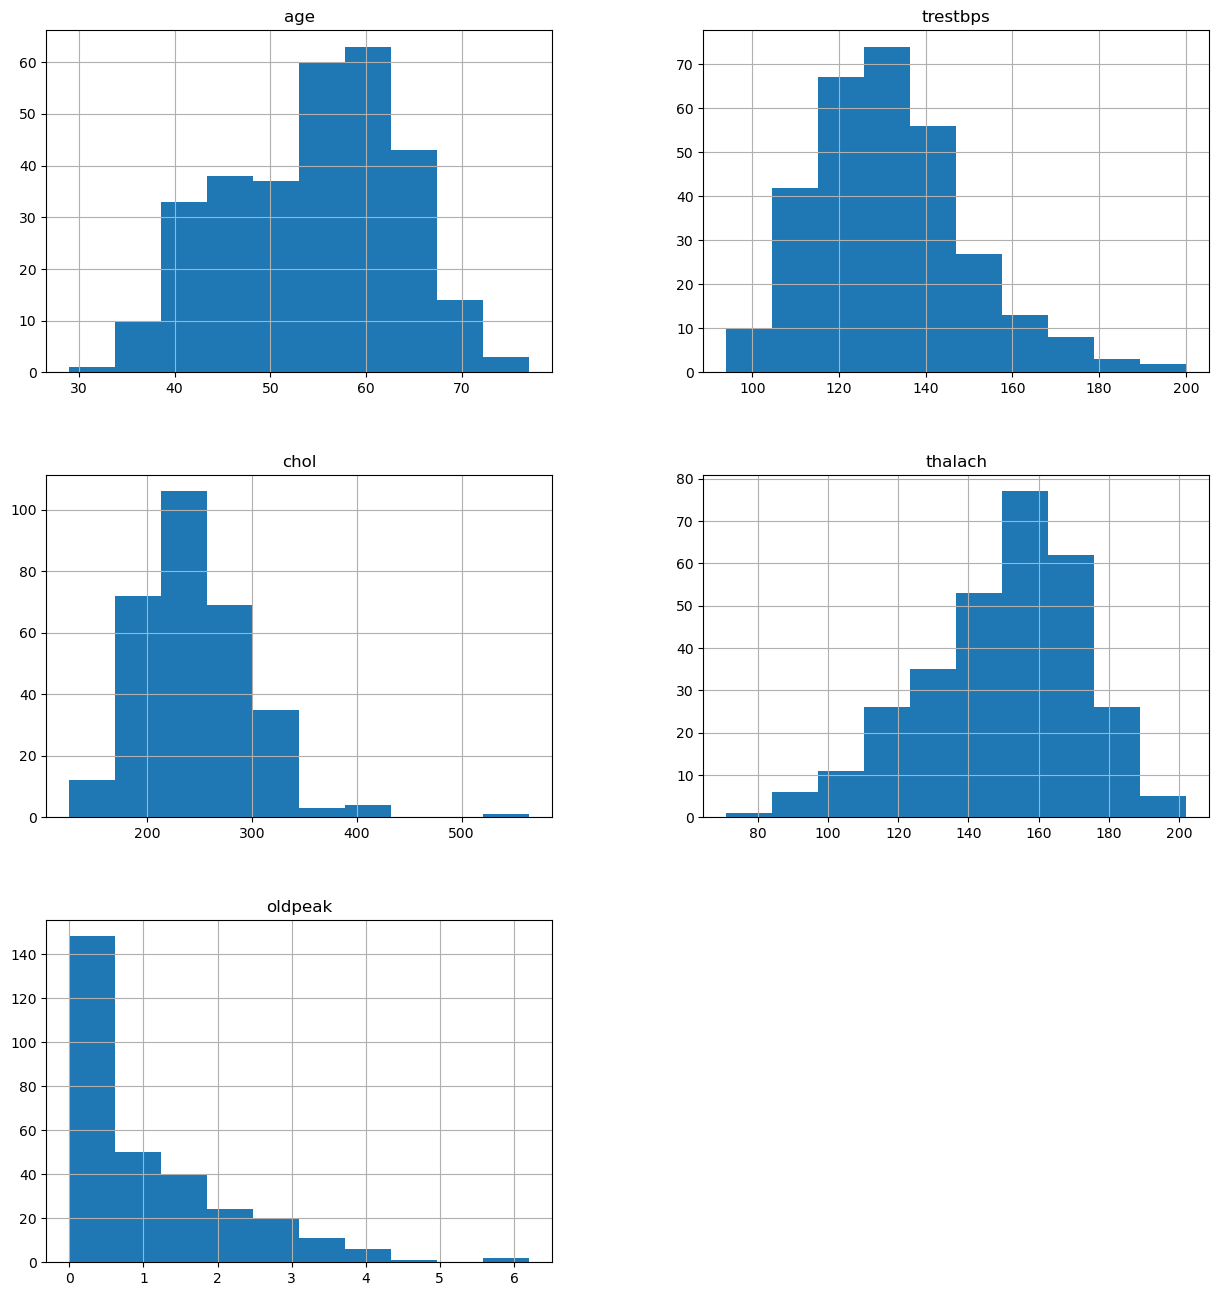

In [52]:
data.hist(cont_val,figsize=(15,16))
plt.show()

In [53]:
# Create training and test datasets
X = data.drop(columns=['target'])  # Features excluding the target column
y = data['target']  # Target column (disease prediction)


In [56]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:


# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred))

# Predict for a new sample (example)
sample_data = np.array([[63, 1, 3, 145, 233, 1, 2, 150, 0, 2, 3, 1, 0]])  # Example data (age, sex, ...)
sample_prediction = model.predict(sample_data)

# Display prediction result
print(f"Prediction for sample data: {'Disease' if sample_prediction[0] == 1 else 'No Disease'}")